## Word2Vec
---
- The goal of the paper is to introduce the techniques that can be used for learning high-quality word vectors from huge data sets with billions of words, and with millions of words in the vocabulary.
- The authors used a technique in which the quality fo resulting vector representations, with the expectation that not only will similar words tend to be close to each otherm but that can have multiple degrees of similarity.
- Eg: vector("King") - vector("Man") + vector("Woman") results in a vector that is closest to the vector representations of the word Queen.
- The authors try to maximize accuracy of these vector operations by developing a new model architectures that preserve the linear regularities among words.
- For the models suggested in the paper the training complexity is proprotional to:
- O = E x T x Q.
- E: Number of training epochs.
- T: Number of the words in the training set.
- Common choice is E = 3-50
- T is upto One Billion
---
### New Log-linear Models 
 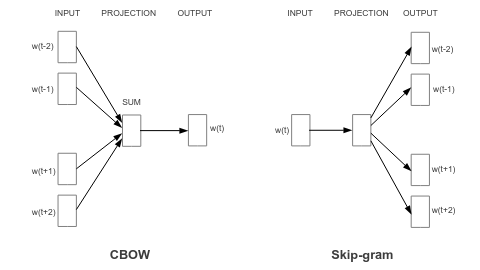
- The neural networks models are computationally expensive due to hidden layers in the model. So author explored the simple models. They might not be able to represent the data as precisely as neural networks, but can possibly be trained on much more data efficiently.
- **Continuous Bag-of-Words Model**
  - It is similar to the feedforward NNLM, where the non-linear hidden layer is removed and the projection layer is shared for all words(all words get projected into the same position (their vectos are averaged)).
  - We call this architecture bag-of-words in the history does not influence the projection.
  - The best performance is obtained on the task by building a log-linear classifier with four future and four history words at the input, where the training criterion is to correctly classify the current (middle) word.
  - The training complexity is then
    $$Q = N * D + D * log_2(V)$$
---
- **Continuous Skip-gram Model**
   - This architecture is similar to CBOW, but instead of predicting the current word based on the context, it tries to maximize classification of a words based on another word in the same sentence.
   - More precisely, we use each current word as an input to a log-linear classifier with continuous projection layer, and predict words with a certain range before and after the current word.
   - We found that increasing the range improves quality of the resulting word vectors, but it also increases the computational complexity. Since the more distant words are usually less related to the current
word than those close to it, we give less weight to the distant words by sampling less from those
words in our training examples.
   - The training complexity of this architecture is proportional to
     $$ Q = C * (D + D * log_2(V)) $$
     - Where C -> Maximum distance of the words.
     - Thus, if we choose C = 5, for each training word we will select randomly a number R in range <1;c> and then use R words from history and R words from the future of current word as correct labels.
     - This will require us to do R x 2 word classifications, with current word as input, and each of the R + R words as output. 